In [1]:
import warnings

warnings.filterwarnings("ignore")

import os.path

import matplotlib.pyplot as plt
import numpy as np
from PAOFLOW import PAOFLOW

### PW to LCAO

In [2]:
paoflow = PAOFLOW.PAOFLOW(savedir='/home/anooja/Desktop/los-dmrg/tests/triangulene/output/qe/aiida.save', model=None, outputdir='/home/anooja/Desktop/los-dmrg/tests/triangulene/output/paoflow', smearing='gauss',verbose=True)
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 1 1 1 0 0 0
Insulator: True
Magnetic: False
Number of kpoints: 1
Number of electrons: 61.000000
Number of bands: 37
SciPy will 

[anooja-ThinkPad-X1-Carbon-Gen-11:36646] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


In [3]:
paoflow.projections()

atom: C   pseudo: C.pbesol-n-kjpaw_psl.1.0.0.UPF  tau: [23.00326664 16.25164458 14.17294593]
      atwfc:   1  2S  l=0, m=1
      atwfc:   2  2P  l=1, m=1
      atwfc:   3  2P  l=1, m=2
      atwfc:   4  2P  l=1, m=3
atom: C   pseudo: C.pbesol-n-kjpaw_psl.1.0.0.UPF  tau: [20.6602204  17.60435933 14.17294593]
      atwfc:   5  2S  l=0, m=1
      atwfc:   6  2P  l=1, m=1
      atwfc:   7  2P  l=1, m=2
      atwfc:   8  2P  l=1, m=3
atom: C   pseudo: C.pbesol-n-kjpaw_psl.1.0.0.UPF  tau: [20.66105007 20.31135676 14.17294593]
      atwfc:   9  2S  l=0, m=1
      atwfc:  10  2P  l=1, m=1
      atwfc:  11  2P  l=1, m=2
      atwfc:  12  2P  l=1, m=3
atom: C   pseudo: C.pbesol-n-kjpaw_psl.1.0.0.UPF  tau: [23.00367344 21.66346998 14.17294593]
      atwfc:  13  2S  l=0, m=1
      atwfc:  14  2P  l=1, m=1
      atwfc:  15  2P  l=1, m=2
      atwfc:  16  2P  l=1, m=3
atom: C   pseudo: C.pbesol-n-kjpaw_psl.1.0.0.UPF  tau: [25.34671969 20.31075524 14.17294593]
      atwfc:  17  2S  l=0, m=1
      at

In [4]:
# build the paoflow bands
paoflow.projectability()

Projectability vector  [0.98446181 0.98435254 0.98436099 0.98596957 0.98597373 0.98742535
 0.98611994 0.97977183 0.98007193 0.98006897 0.98407381 0.98406418
 0.97898563 0.97895576 0.97279723 0.98763365 0.98763359 0.9878201
 0.96946736 0.98901417 0.98638515 0.98640057 0.99292413 0.98799208
 0.98800567 0.99427813 0.99427881 0.99702852 0.99703142 0.997459
 0.99152824 0.94849636 0.94371986 0.94364719 0.26258075 0.21132921
 0.21418874]
# of bands with good projectability > 0.95 = 31
Range of suggested shift  2.4282370109800855  ,  2.4282370109800855
Projectability in:                          0.012 sec


In [5]:
paoflow.read_atomic_proj_QE()

In [6]:
Sk = arry["Sks"][:,:,0].real


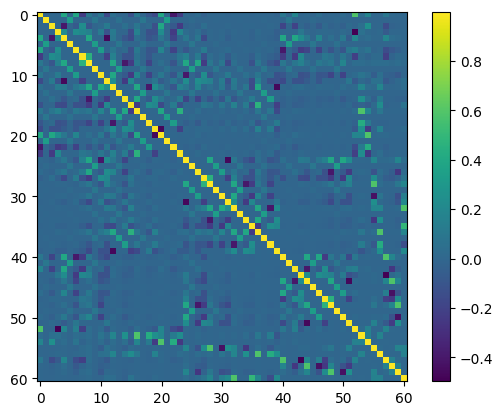

In [7]:
plt.imshow(Sk)
plt.colorbar()

In [8]:
paoflow.pao_hamiltonian()
# arry["HRs"] has dimensions (nawf,nawf,nk1,nk2,nk3,nspin)
HR = arry["HRs"][:,:,0,0,0,0]


Building Hks in:                            0.321 sec
k -> R in:                                  0.010 sec


In [9]:
SR = arry["SRs"][:,:,0]

Bands in:                                   0.653 sec


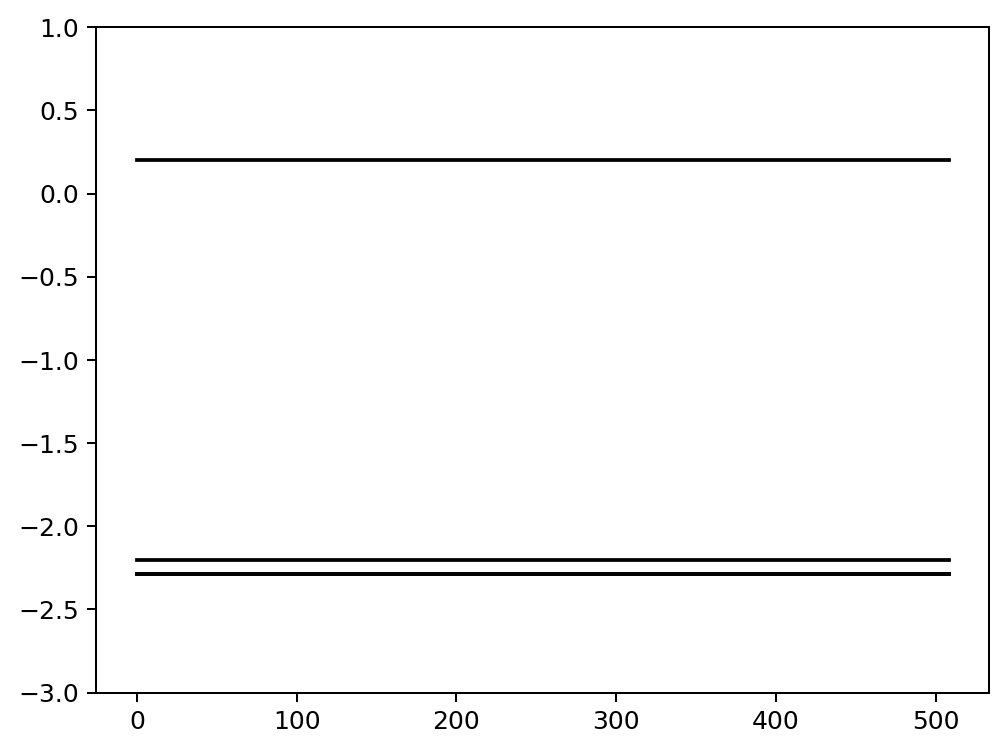

In [10]:
paoflow.bands(ibrav=2, nk=500)
fig = plt.figure(dpi=180)
# plot the paoflow bands
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.ylim(-3,1)
plt.show()

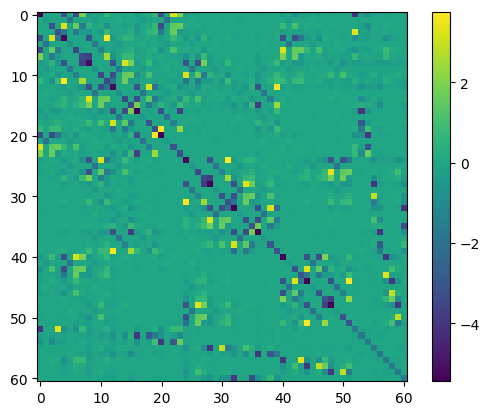

In [11]:
plt.imshow(HR.real)
plt.colorbar()

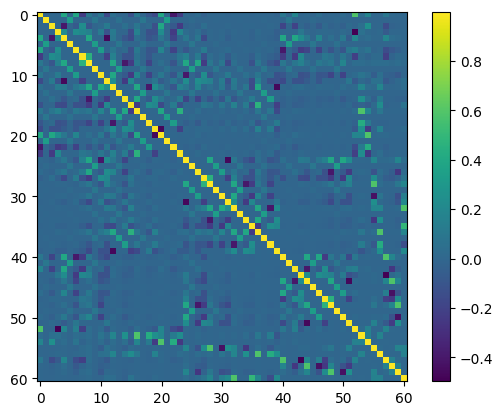

In [12]:
plt.imshow(SR.real)
plt.colorbar()

### LCAO to LOs

In [13]:
import numpy as np
from ase import *
from gpaw import *
from qtpyt.basis import Basis
from qtpyt.lo.tools import rotate_matrix, subdiagonalize_atoms
from ase.io import read


In [14]:
arry['atoms']

['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

In [15]:
nao_a = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
len(nao_a)

22

In [17]:
H_lcao = HR
S_lcao = SR

In [18]:
def get_species_indices(atoms,species):
    indices = []
    for element in species:
        element_indices = atoms.symbols.search(element)
        indices.extend(element_indices)
    return sorted(indices)

In [19]:
atoms = read('./struct.xyz')
basis = Basis(atoms, nao_a)

SUBDIAG_SPECIES = ("C", "H")
subdiag_indices = get_species_indices(atoms, SUBDIAG_SPECIES)
# Extract the basis for the subdiagonalized region and get their indices
basis_subdiag_region = basis[subdiag_indices]
index_subdiag_region = basis_subdiag_region.get_indices()

Usub, eig = subdiagonalize_atoms(basis, H_lcao, S_lcao, a=subdiag_indices)

# Rotate matrices
H_subdiagonal = rotate_matrix(H_lcao, Usub)
S_subdiagonal = rotate_matrix(S_lcao, Usub)


In [20]:
def plot_hamiltonian_overlap(H, S, cmap, norm, title_H="H Matrix", title_S="S Matrix"):
    """
    Plot the Hamiltonian and Overlap matrices with a shared colorbar and customized color mapping.

    Parameters:
    - H: np.ndarray, Hamiltonian matrix to visualize.
    - S: np.ndarray, Overlap matrix to visualize.
    - cmap: Colormap, the colormap for the plot.
    - norm: Normalization, the normalization for color mapping.
    - title_H: str, Title for the Hamiltonian plot.
    - title_S: str, Title for the Overlap plot.

    Returns:
    - None, displays the plots.
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot H matrix
    cax1 = axs[0].imshow(np.abs(H), interpolation='nearest', cmap=cmap, norm=norm)
    axs[0].set_title(title_H)

    # Plot S matrix
    cax2 = axs[1].imshow(np.abs(S), interpolation='nearest', cmap=cmap, norm=norm)
    axs[1].set_title(title_S)

    # Add a single colorbar shared by both subplots
    cbar = fig.colorbar(cax2, ax=axs, orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label('Energy (eV)')

    # plt.tight_layout()
    plt.show()

In [21]:
from matplotlib.colors import LinearSegmentedColormap, LogNorm
cmap_name = 'custom_white_red'
colors = [(1, 1, 1), (166/255, 4/255, 4/255)]
n_bins = 100
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
norm = LogNorm(vmin=0.1, vmax=10)

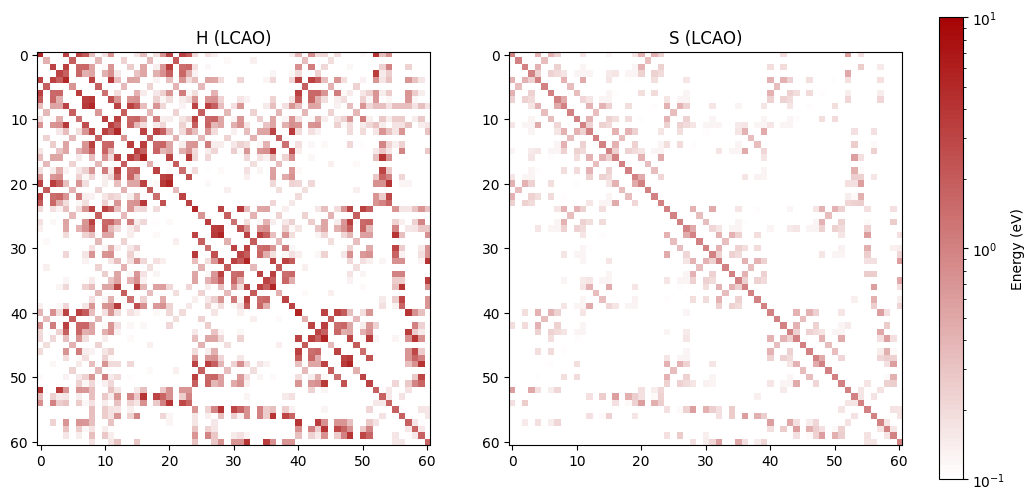

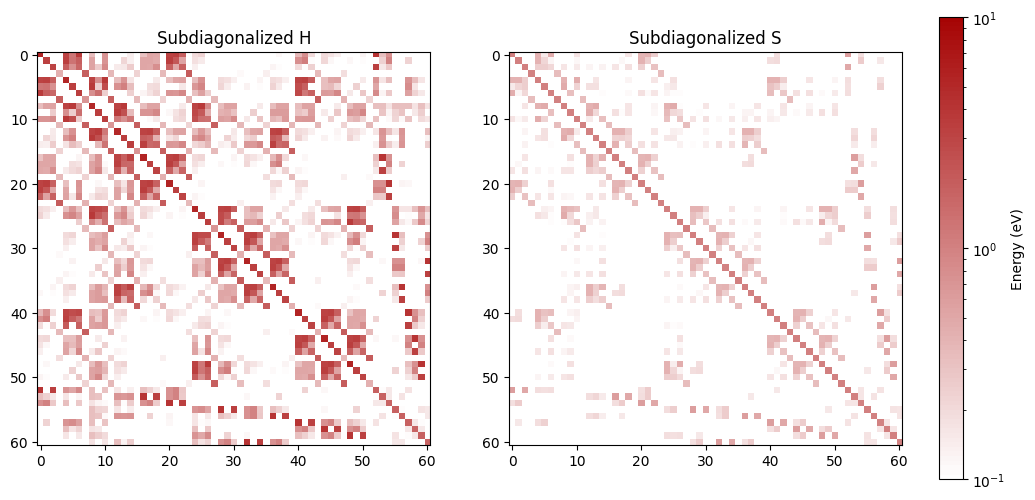

In [22]:
# Plot LCAO matrices
plot_hamiltonian_overlap(H_lcao, S_lcao, title_H="H (LCAO)", title_S="S (LCAO)", cmap=cmap, norm=norm)

# Plot subdiagonalized matrices
plot_hamiltonian_overlap(H_subdiagonal, S_subdiagonal, title_H="Subdiagonalized H", title_S="Subdiagonalized S", cmap=cmap, norm=norm)


In [23]:

def create_active_hamiltonian(H, S,  index_active_region):
    # Create a list of indices to retain
    indices_to_keep = sorted(list(index_active_region))

    # Create the H_active matrix by extracting the relevant rows and columns
    H_active = H[np.ix_(indices_to_keep, indices_to_keep)]
    S_active = S[np.ix_(indices_to_keep, indices_to_keep)]

    return H_active, S_active


In [24]:
# Define the active region within the subdiagonalized species (C 2 pz in this case)
active = {'C':[3]}
extract_active_region = basis_subdiag_region.extract().take(active)
index_active_region = index_subdiag_region[extract_active_region]


for idx in index_active_region:
    if Usub[idx-1,idx] < 0.: # change sign
        Usub[:,idx] *= -1

H_active, S_active = create_active_hamiltonian(H_subdiagonal, S_subdiagonal, index_active_region)

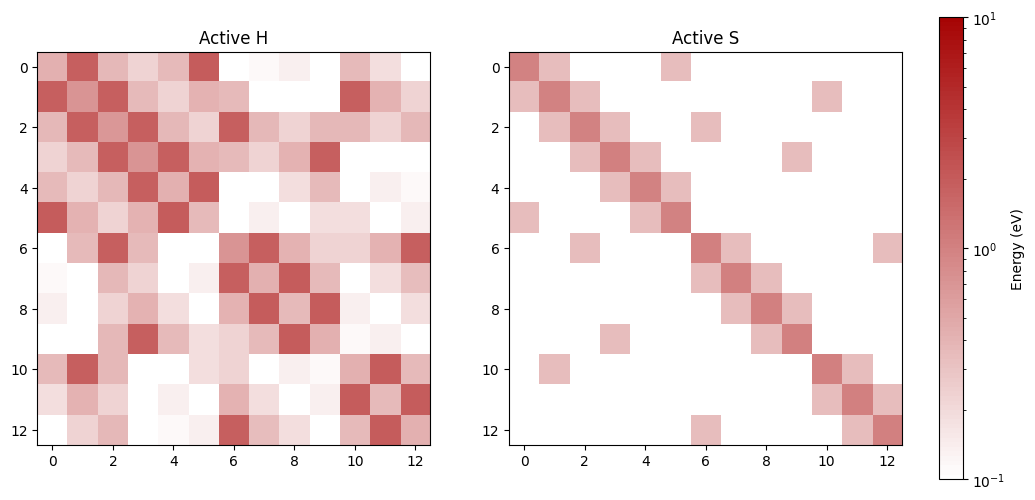

In [25]:

plot_hamiltonian_overlap(H_active, S_active, title_H="Active H", title_S="Active S", cmap=cmap, norm=norm)

In [26]:
def print_largest_non_diagonal_elements(S, n=3):
    """
    Prints the n largest non-diagonal absolute values from an overlap matrix.

    Parameters:
    - S: np.ndarray, the overlap matrix.
    - n: int, the number of largest non-diagonal elements to print.

    Returns:
    - None, prints the largest values and their indices.
    """
    # Ensure the input matrix is square
    assert S.shape[0] == S.shape[1], "The overlap matrix must be square."

    # Get absolute values and remove the diagonal by setting it to zero
    abs_S = np.abs(S)
    np.fill_diagonal(abs_S, 0)

    # Find the indices of the largest elements
    flat_indices = np.argsort(abs_S, axis=None)[-n:]
    row_indices, col_indices = np.unravel_index(flat_indices, S.shape)
    largest_values = abs_S[row_indices, col_indices]

    # Print the results
    print(f"The {n} largest non-diagonal elements in the overlap matrix are:")
    for i in range(n):
        print(f"Value: {largest_values[i]:.4f} at indices ({row_indices[i]}, {col_indices[i]})")

In [27]:
print_largest_non_diagonal_elements(S_active, n=1)

The 1 largest non-diagonal elements in the overlap matrix are:
Value: 0.3349 at indices (3, 2)


In [28]:
from scipy.linalg import eigh

In [29]:
def calculate_homo_lumo(H, S, homo_index, lumo_index):
    """Calculate HOMO, LUMO, and the HOMO-LUMO gap."""
    eigenvalues, _ = eigh(H, S)
    homo_energy = eigenvalues[homo_index]
    lumo_energy = eigenvalues[lumo_index]
    homo_lumo_gap = lumo_energy - homo_energy

    return homo_energy, lumo_energy, homo_lumo_gap

def plot_orbital_energies(H, S, fermi_level=0, n_valence=1, n_conduction=3, title='Orbital Energies'):
    """Plot eigenvalues around the Fermi level."""
    eigenvalues, _ = eigh(H, S)
    fermi_index = np.argmin(np.abs(eigenvalues - fermi_level))
    start_index = max(fermi_index - n_valence, 0)
    end_index = min(fermi_index + n_conduction + 1, len(eigenvalues))
    selected_indices = np.arange(start_index, end_index)

    plt.figure(figsize=(8, 6))
    x_min, x_max = -0.5, 0.5

    for idx in selected_indices:
        energy = eigenvalues[idx]
        plt.hlines(energy, x_min, x_max, colors='blue', linestyles='--')
    plt.axhline(0, color='red', linestyle='--', label='Fermi Level')

    plt.title(title)
    plt.ylabel('Energy (eV)')
    plt.legend()
    plt.grid(True)
    plt.show()


HOMO energy: -1.9412072214026017 eV
LUMO energy: 0.24650573881726448 eV
HOMO-LUMO gap: 2.187712960219866 eV


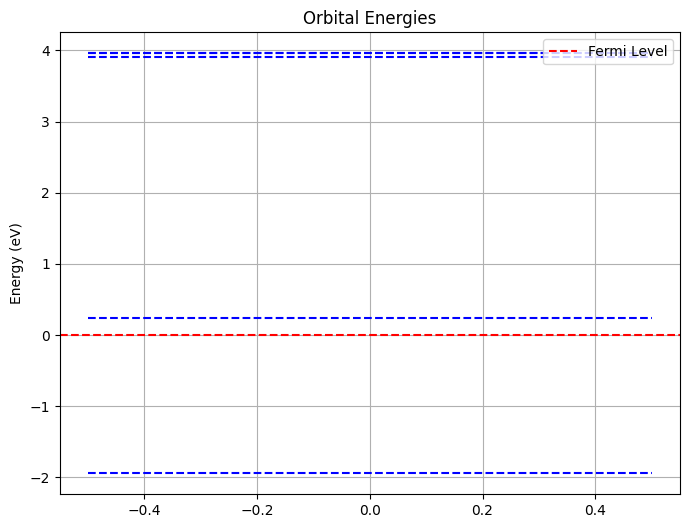

In [30]:
# # Diagonalize the Hamiltonian and overlap matrices
# eigenvalues, eigenvectors = eigh(H_lcao, S_lcao)
# # Calculate HOMO and LUMO energies, and gap
# homo_energy, lumo_energy, homo_lumo_gap = calculate_homo_lumo(H_lcao, S_lcao,homo_index,lumo_index)
# print(f"HOMO energy: {homo_energy} eV")
# print(f"LUMO energy: {lumo_energy} eV")
# print(f"HOMO-LUMO gap: {homo_lumo_gap} eV")

# # Plot orbital energies around the Fermi level
# plot_orbital_energies(H=H_lcao, S=S_lcao, fermi_level=0, n_valence=1, n_conduction=3)


# # Diagonalize the Hamiltonian and overlap matrices
# eigenvalues, eigenvectors = eigh(H_subdiagonal, S_subdiagonal)

# # Calculate HOMO and LUMO energies, and gap
# homo_energy, lumo_energy, homo_lumo_gap = calculate_homo_lumo(H_subdiagonal,S_subdiagonal,homo_index,lumo_index)
# print(f"HOMO energy: {homo_energy} eV")
# print(f"LUMO energy: {lumo_energy} eV")
# print(f"HOMO-LUMO gap: {homo_lumo_gap} eV")

# # Plot orbital energies around the Fermi level
# plot_orbital_energies(H=H_subdiagonal, S=S_subdiagonal, fermi_level=0, n_valence=1, n_conduction=3)

# # Diagonalize the Hermitian Hamiltonian using eigh (eigenvalues are automatically sorted)
eigenvalues, eigenvectors = eigh(H_active,S_active)

# Since the H_active has dimensions 26 X 26 and there are 2 electrons per state, 13 states are occupied and 13 are unoccupied.
lumo_index_active = int(np.shape(H_active)[0]/2)
homo_index_active = lumo_index_active - 1

# Calculate HOMO and LUMO energies, and gap
homo_energy, lumo_energy, homo_lumo_gap = calculate_homo_lumo(H_active,S_active,homo_index_active,lumo_index_active)
print(f"HOMO energy: {homo_energy} eV")
print(f"LUMO energy: {lumo_energy} eV")
print(f"HOMO-LUMO gap: {homo_lumo_gap} eV")

# Plot orbital energies around the Fermi level
plot_orbital_energies(H=H_active, S=S_active, fermi_level=0, n_valence=1, n_conduction=3)
